# Universidad Politecnica Salesiana
---
### Simulacion

#### La integracion de Monte Carlo
---
##### Realizado por:  Soa Vanessa Amendano Murillo


### Monte Carlo

Metodo que implementa numeros aleatorios ya sea finita o infinita de la cual se conoce su distribucion probailistica mediante el calculo numerico de expresiones matematicas.

#### Distribución de probabilidad

Por lo generar basta asociarlo con uno o varios números X (variables aleatorias) a cada resultado del experimento.

Si se dice que una variable aleatoria tiene una distribución discreta se obtiene la función distribución de probabilidad.

<img src="2.PNG" /> </div>

<img src="3.PNG" /> </div>

En donde los valores discretos son k que van desde 0 a n

<img src="4.PNG" /> </div>

Se considera distribucion continua si en la función existe f con integral total unidad, tal que para todo x1 <= x2

En donde f es la densidad de probabilidad, quedando la funcion de distribucion acumulada

<img src="6.PNG" /></div>

#### Distribuciones mas habituales

<img src="7.PNG"/> </div>


#### EJEMPLOS EN CLASE:

In [3]:
import math
import random

class Montecarlo:
    
    def __init__(self):
        print("Inicializa...")
        
    
    def fy(self,ri,a,b):
        res = math.pow((b-a)*ri+a,2.0)+\
            math.sqrt((b-a)*ri+a)
        return res
    
    def integral(self,a,b,N):
        suma = 0.0
        ri = 0.0
        for i in range(N):
            ri = random.random()
            suma+=self.fy(ri,a,b)
            
        res = ((b-a)/N)*suma
        return res
    
if __name__=="__main__":
    monte=Montecarlo()
    res = monte.integral(10.0,27.0,100000)
    print("Res: ",res)


Inicializa...
Res:  6302.030914563966


In [2]:
import math
import random
import numpy as np

class IntegralMontecarlo:
    
    def __init__(self):
        print('Montecarlo')
        
    
    def hy(self, ui, a, b):
        temp1 = np.power(ui*(b-a)+a, 4.0)
        temp2 = 4*(ui*(b-a)+a)+2
        suma = np.sum(temp1+temp2)
        return suma*(b-a)/float(len(ui))
    
    def integrar(self,a, b, n):
        ui = []
        for i in range(n):
            ui.append(random.random())
            
        res = self.hy(np.array(ui), a, b)
        return res
        
if __name__=="__main__":
    integral = IntegralMontecarlo()
    res = integral.integrar(-1.0, 5, 10000)
    print('Res:     {%.2f}' % res)
        


Montecarlo
Res:     {661.15}


### Monitoreo de la varianza

Esto nos permite ver cuantas iteraciones se necesitan para que converja, para ello se necesita tener intervalos de confianza por ejemplo se intenta estimar la siguiente funcion.

f (x) = x \ cos 7x + \ sin 13x, \ \ 0 \ le x \ le 1

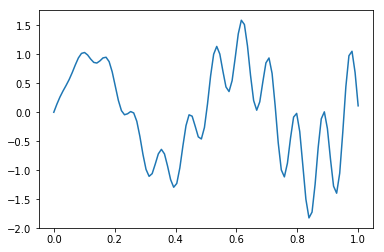

In [7]:
import numpy as np
import math
import matplotlib.pyplot as plt

def f(x):
    return x * np.cos(71*x) + np.sin(13*x)
 
x = np.linspace(0, 1, 100)
plt.plot(x, f(x))
 

estimacion de la integracion de monte carlo

In [8]:
n = 100
x = f(np.random.random(n))
y = 1.0/n * np.sum(x)
y

0.12232467357653823

ejemplo de uso de multiples secuencuas independientes en el monitoreo de la convergencia dentro de una muestra de 1 a 100 en donde la linea roja muestra la ruta de muestra y linea azul indica los percentiles 

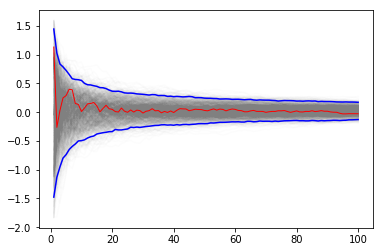

In [9]:
n = 100
reps = 1000

x = f(np.random.random((n, reps)))
y = 1/np.arange(1, n+1)[:, None] * np.cumsum(x, axis=0)
upper, lower = np.percentile(y, [2.5, 97.5], axis=1)

plt.plot(np.arange(1, n+1), y, c='grey', alpha=0.02)
plt.plot(np.arange(1, n+1), y[:, 0], c='red', linewidth=1);
plt.plot(np.arange(1, n+1), upper, 'b', np.arange(1, n+1), lower, 'b')

ejemplo de uso de bootstrap para monitorear la convergencia en 1000 interaciones la linea roja muestra la ruta de muestra y linea azul indica los percentiles 

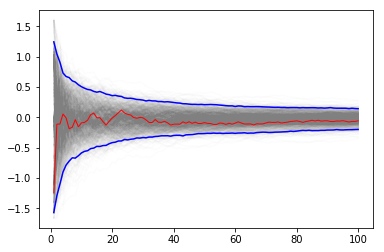

In [10]:

xb = np.random.choice(x[:,0], (n, reps), replace=True)
yb = 1/np.arange(1, n+1)[:, None] * np.cumsum(xb, axis=0)
upper, lower = np.percentile(yb, [2.5, 97.5], axis=1)
plt.plot(np.arange(1, n+1)[:, None], yb, c='grey', alpha=0.02)
plt.plot(np.arange(1, n+1), yb[:, 0], c='red', linewidth=1)
plt.plot(np.arange(1, n+1), upper, 'b', np.arange(1, n+1), lower, 'b')

### Reduccion de la varianza

la varianza con muestras independientes es 

<img src="9.PNG"/> </div>

en donde un cambio de varianza mediante tecnicas que permiten reducir y mejorar la precision sin aumentar la cantidad de muestras como:

+ Muestreo de importancia
+ Muestreo Estratificado
+ Variables de Control
+ Variables Antiteticas

### Variables antiteticas

la primera es elegir dos conjuntos de numeros aleatorios en donde tienen la misma distribucion estando negativamente correlacionas.

<img src="8.PNG"/> </div>


In [11]:

def f(x):
    return x * np.cos(71*x) + np.sin(13*x)

from sympy import sin, cos, symbols, integrate

x = symbols('x')
sol = integrate(x * cos(71*x) + sin(13*x), (x, 0,1)).evalf(16)
sol

0.02025493910239406

Vanilla de monte Carlo en donde la varianza utiliza la primera mitad de u complementando con 1-u

In [12]:
n = 10000
u = np.random.random(n)
x = f(u)
y = 1.0/n * np.sum(x)
y, abs(y-sol)/sol

(0.01726744154530575, 0.1474947686579416)

al estar correlacionados negativamente la suma de la varianza sera menor 

In [13]:
u = np.r_[u[:n//2], 1-u[:n//2]]
x = f(u)
y = 1.0/n * np.sum(x)
y, abs(y-sol)/sol

(0.02315794727638524, 0.1433234708490463)

### Quasi-Monte Carlo

el agrupamiento reduce la precision en donde los puntos cercanos proporcionan poca informacion en donde se planifica un muestreo estrategico que utiliza numeros aleatorios para llenar ese espacio de manera eficiente reduciendo las secuencias de baja discrepancia 

En el ejemplo siguiente se determina los numeros pseudoaleatorios con el algoritmo de Mersenne Twister en donde se genera con numeros de distribucion casi uniformes en periodos grandes. despes en base al modelo de monte carlo calculara el volumen de como una probabilidad, con el fin de aproximarce a ciertas expresiones a traves de adivinarlas con la ayudad de la cantidad de numeros aleatorios a calcular en donde se realiza con diversas tecnicas como la reducion de varianza

In [15]:
import random
import matplotlib.pyplot as plt
import numpy as np

random.seed(1984) # semilla para replicar la aleatoriedad
random.random() # primer llamado a random

0.36352835585530807

In [16]:
random.random()

0.49420568181919666

In [17]:

for i in range(5):
    print(random.random())

0.33961008717180197
0.21648780903913534
0.8626522767441037
0.8493329421213219
0.38578540884489343


In [18]:
random.seed(1984) 
for i in range(7):
    print(random.random()) 

0.36352835585530807
0.49420568181919666
0.33961008717180197
0.21648780903913534
0.8626522767441037
0.8493329421213219
0.38578540884489343


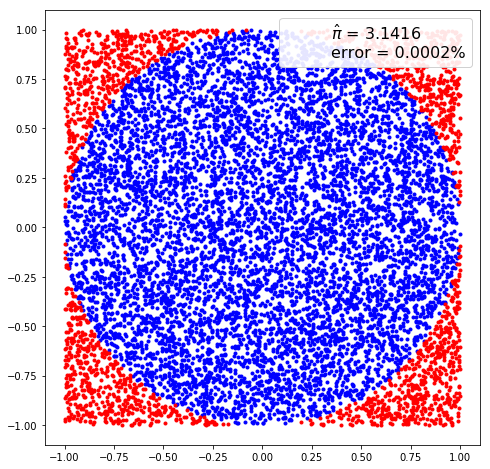

In [23]:
def mc_pi_aprox(N=10000):
    plt.figure(figsize=(8,8))  # tamaño de la figura
    x, y = np.random.uniform(-1, 1, size=(2, N))
    interior = (x**2 + y**2) <= 1
    pi = interior.sum() * 4 / N
    error = abs((pi - np.pi) / pi) * 100
    exterior = np.invert(interior)
    
    plt.plot(x[interior], y[interior], 'b.')
    plt.plot(x[exterior], y[exterior], 'r.')
    plt.plot(0, 0, label='$\hat \pi$ = {:4.4f}\nerror = {:4.4f}%'
             .format(pi,error), alpha=0)
    plt.axis('square')
    plt.legend(frameon=True, framealpha=0.9, fontsize=16)

mc_pi_aprox()

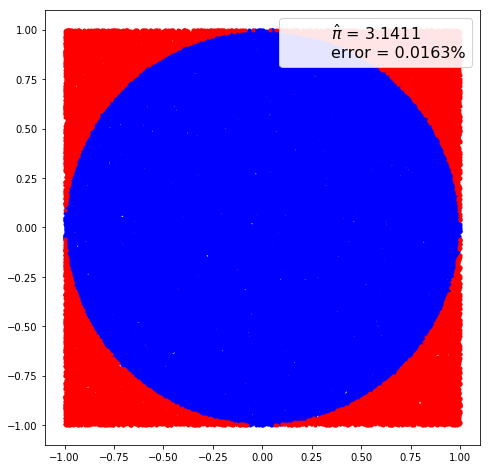

In [24]:
mc_pi_aprox(N=100000)


### Referencias

+ http://people.duke.edu/~ccc14/sta-663-2016/15C_MonteCarloIntegration.html
+ https://people.duke.edu/~ccc14/sta-663/MonteCarlo.html
+ http://www.cs.toronto.edu/~guerzhoy/180/lectures/W10/lec2/MonteCarloInt.html
+ https://tresenrayablog.wordpress.com/2015/03/08/python-para-economistas-simulacion-montecarlo-estimar-pi/
